# Linear Regression

## การวิเคราะห์การทดถอยแบบเส้นตรง

### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naii/Desktop/project/cs265/env

### กำหนดจำนวนจุด สำหรับการจำลอง linear regression

In [3]:
# Define the number of points to generate 
num_points = 2400

### สร้างข้อมูลจำลองด้วยสมการเส้นตรง y=mx+c แบบสุ่ม

In [4]:
# Generate the data based on equation y = mx + c 
data = []
m = 0.2
c = 0.5
for i in range(num_points):
    # Generate 'x'
    x = np.random.normal(0.0, 0.9)
    # Generate some noise
    noise = np.random.normal(0.0, 0.09)
    # Compute 'y'
    y = m*x + c + noise
    data.append([x, y])

### แยกข้อมูล แกนx แกนy

In [5]:
# Separate x and y
x_data = [d[0] for d in data] 
y_data = [d[1] for d in data]

### plot กราฟ การจำลองข้อมูล

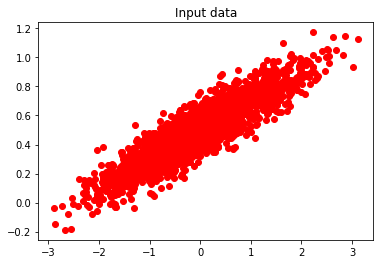

In [6]:
# Plot the generated data 
plt.plot(x_data, y_data, 'ro') 
plt.title('Input data') 
plt.show()

### สร้าง biases และ weights ของ tensorflow

In [7]:
# Generate weights and biases
W = tf.Variable(tf.compat.v1.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.zeros([1]))

### กำหนด สมการเชิงเส้น

In [8]:
# Define equation for 'y'
y = W * x_data + b

### กำหนดวิธีการคำนวน loss

In [9]:
# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

### กำหนด gradient descent optimizer

In [11]:
# Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss)

### เริ่มต้นกำหนดตัวแปรของ tensorflow

In [13]:
# Initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


### สร้าง session ของ tensorflow

In [14]:
# Start the tensorflow session and run it 
sess = tf.Session()
sess.run(init)

## Train


ITERATION 1
W = 0.09993759
b = 0.4830789
loss = 0.016677618


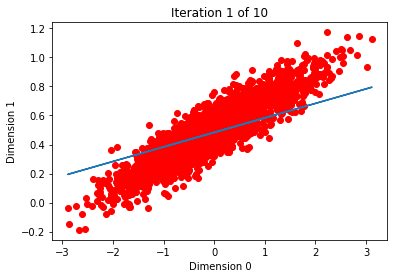


ITERATION 2
W = 0.18421073
b = 0.49906528
loss = 0.008152138


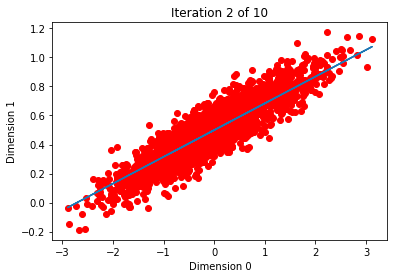


ITERATION 3
W = 0.19749352
b = 0.5021036
loss = 0.007936964


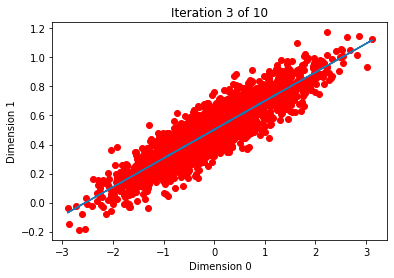


ITERATION 4
W = 0.1996058
b = 0.5025825
loss = 0.007931527


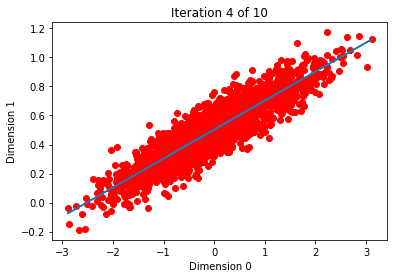


ITERATION 5
W = 0.19994155
b = 0.50265867
loss = 0.007931389


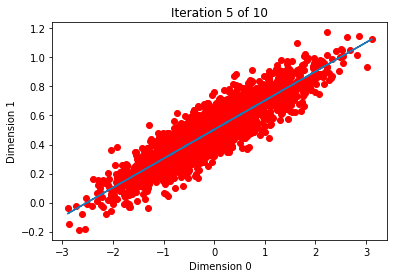


ITERATION 6
W = 0.19999492
b = 0.50267076
loss = 0.007931386


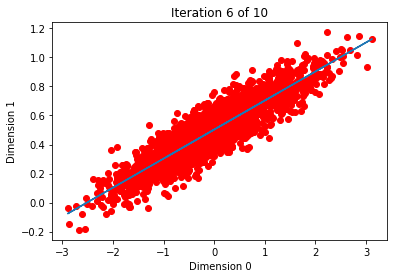


ITERATION 7
W = 0.2000034
b = 0.5026727
loss = 0.007931385


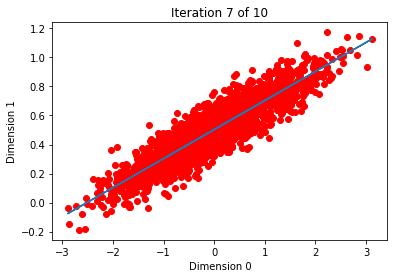


ITERATION 8
W = 0.20000474
b = 0.502673
loss = 0.007931385


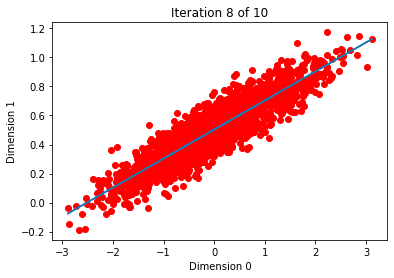


ITERATION 9
W = 0.20000497
b = 0.50267303
loss = 0.007931385


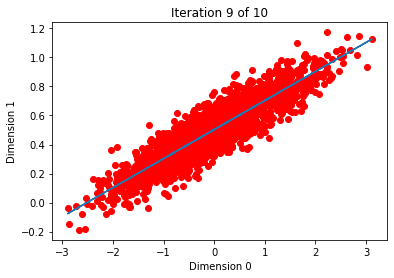


ITERATION 10
W = 0.200005
b = 0.50267303
loss = 0.007931386


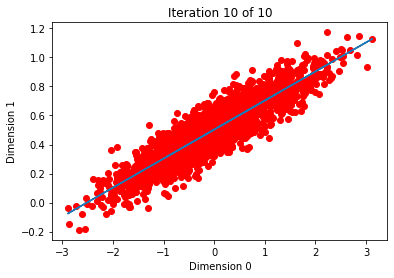

In [15]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
# Run the session 
    sess.run(train)
    # Print the progress 
    print('\nITERATION', step+1) 
    print('W =', sess.run(W)[0]) 
    print('b =', sess.run(b)[0]) 
    print('loss =', sess.run(loss))
    # Plot the input data 
    plt.plot(x_data, y_data, 'ro')
    # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations)) 
    plt.show()